# Convolutional Neural Network Architectures 5 - Inception Net

Welcome to the 8th notebook. In this notebook, we will go deeper!

* In this paper, we will focus on an efficient deep neural network architecture for computer vision, codenamed Inception, which derives its name from the Network in network paper by [Lin et al](https://arxiv.org/abs/1312.4400) and in conjunction with the famous “we need to go deeper” internet meme. - [Going deeper with convolutions](https://arxiv.org/pdf/1409.4842)

<img src='imgs/imgs1.jpg' width="%40"></img>

<a href="https://encrypted-tbn3.gstatic.com/images?q=tbn:ANd9GcSi1MBRtp3J0Q_XK_nrZDNX9Ah0xugD1J7sFQOjDVMWPSU6QnkI"> Source </a>

In the previous notebook, we learnt about VGG architecture which is a huge convolutional neural network. The developers of VGG architecture followed the research direction idea that building deeper convolutional neural networks yield better results. Developers of the Inception network architecture also followed the same trend, however, they did not directly stack convolutional layers and pooling layers. Instead, they used the subnetwork idea of the Network in Network architecture and created inception blocks. They effectively combined these blocks and built the architecture below.

<img src='https://images4.russianblogs.com/868/97/979e7888100bd9d585f9feec76960934.png' width="%100"></img>
<a href="https://arxiv.org/abs/1409.4842"> Source </a>

This architecture even though being quite deep, has only 5 million parameters whereas VGG-16 had 138 million parameters. On top of that, this architecture surpassed VGG architecture in ImageNet Challenge in 2014 and won the competition with a
top-5 error of 6.7% (against it was 7.3% with VGG). Let's first uncover the basic building block of this architecture and see what other layers the architecture has.

## The Inception Module

<img src='https://production-media.paperswithcode.com/methods/Screen_Shot_2020-06-22_at_3.22.39_PM.png' width="%50"></img>
<a href="https://arxiv.org/abs/1409.4842"> Source </a>

AlexNet used convolutional layers with large filters which increase computational cost and reduce the ability of the network to capture fine-grained details. VGG-Net, on the other hand, used smaller filters and stacked them together to increase the receptive field and non-linearity. Choosing the optimal convolutional filter size for a given layer and effectively stacking them together is an important problem. To address this issue, the naive inception block was designed to use filters of different sizes (1x1, 3x3, and 5x5) in parallel, and then concatenate their output feature maps. This design choice prefers to stack the layers horizontally, and during the training let the network learns by itself which filter may work the best. By using filters of different sizes in parallel, the network can capture information at different spatial scales, allowing it to capture both fine-grained details and higher-level features. By concatenating the output feature maps of each operation, the network can effectively combine information from multiple paths, resulting in a more expressive and powerful feature representation. However, this naive module again can blow up the number of parameters when it is stacked several times.

* One big problem with the above modules, at least in this naıve form, is that even a modest number of 55 convolutions can be prohibitively expensive on top of a convolutional layer with a large number of filters. This problem becomes even more pronounced once pooling units are added to the mix: their number of output filters equals to the number of filters in the previous stage. The merging of the output of the pooling layer with the outputs of convolutional layers would lead to an inevitable increase in the number of outputs from stage to stage. Even while this architecture might cover the optimal sparse structure, it would do it very inefficiently, leading to a computational blow up within a few stages. - [Going deeper with convolutions](https://arxiv.org/pdf/1409.4842)

The authors note that while using 5x5 convolutions can be effective for capturing features at a larger spatial scale, they can also be computationally expensive, especially when used in combination with a large number of filters and pooling layers. When the number of output filters from a pooling layer is equal to the number of filters in the previous stage, which can lead to an increase in the number of outputs from stage to stage. This can result in a significant computational blow-up within a few stages of the network. To address this issue, the authors also proposed the **Inception module with dimension reductions** that is also used in the architecture.


* This leads to the second idea of the proposed architecture: judiciously applying dimension reductions and projections wherever the computational requirements would increase too much otherwise. This is based on the success of embeddings: even low dimensional embeddings might contain a lot of information about a relatively large image patch. However, embeddings represent information in a dense, compressed form and compressed information is harder to model. We would like to keep our representation sparse at most places and compress the signals only whenever they have to be aggregated en masse. That is, 11 convolutions are used to compute reductions before the expensive 33 and 55 convolutions. Besides being used as reductions, they also include the use of rectified linear activation which makes them dual-purpose. - [Going deeper with convolutions](https://arxiv.org/pdf/1409.4842)

The use of 1x1 convolutions in the inception block allows the network to effectively reduce dimensionality, reduce the number of parameters, and introduce non-linearity into the network so that the network can effectively reduce the number of channels in the input feature maps while increasing its capability to capture non-linear relationships. In addition, these convolutional layers with 1x1 kernels are sometimes also referred to as bottleneck layers since they output fewer feature maps than their inputs, and they can also capture patterns along the depth dimension even though they cannot capture spatial patterns.

* One of the main beneficial aspects of this architecture is that it allows for increasing the number of units at each stage significantly without an uncontrolled blow-up in computational complexity. The ubiquitous use of dimension reduction allows for shielding the large number of input filters of the last stage to the next layer, first reducing their dimension before convolving over them with a large patch size. Another practically useful aspect of this design is that it aligns with the intuition that visual information should be processed at various scales and then aggregated so that the next stage can abstract features from different scales simultaneously. - [Going deeper with convolutions](https://arxiv.org/pdf/1409.4842)

## Intermediary Losses

In the architecture, one thing you may have already noticed is the intermediary losses. The architecture has two auxiliary branches that are used only at training time. Their purpose is to make the gradient flow stable during backpropagation. As previously discussed, the vanishing gradient problem occurs when the gradients during backpropagation become very small as they propagate through many layers. The authors preferred to use auxiliary classifiers to alleviate the vanishing gradient problem, which works by reducing the distance between the first layers and predictions. The output of these auxiliary classifiers is then used to calculate intermediary losses. During training, the intermediary losses are combined with the main loss (auxiliary losses are weighted by 0.3) to compute the total loss. The gradients from both the intermediary losses and the main loss are backpropagated through the network, allowing the gradients to flow through the branches and facilitate learning in the earlier layers. Moreover, by introducing intermediary losses, the network is encouraged to learn more meaningful features at the intermediate stages of the network. This can help prevent overfitting and improve generalization by providing additional regularization signals.


<table>
  <tr>
    <th>Branch 1</th>
    <th>Layer Type</th>
    <th>Output Size</th>
  </tr>
  <tr>
    <td rowspan="6">Branch 1</td>
    <td>Average Pooling (5x5)</td>
    <td>4x4 spatial dimensions</td>
  </tr>
  <tr>
    <td>Convolution (1x1)</td>
    <td>128 filters</td>
  </tr>
  <tr>
    <td>Flatten</td>
    <td>-</td>
  </tr>
  <tr>
    <td>Fully Connected</td>
    <td>1024 units</td>
  </tr>
  <tr>
    <td>Fully Connected</td>
    <td>1024 units</td>
  </tr>
  <tr>
    <td>Dropout</td>
    <td>Dropout rate of 0.7</td>
  </tr>
  <tr>
    <td>Softmax</td>
    <td>Number of classes (final output)</td>
  </tr>
</table>

<table>
  <tr>
    <th>Branch 2</th>
    <th>Layer Type</th>
    <th>Output Size</th>
  </tr>
  <tr>
    <td rowspan="6">Branch 2</td>
    <td>Average Pooling (5x5)</td>
    <td>4x4 spatial dimensions</td>
  </tr>
  <tr>
    <td>Convolution (1x1)</td>
    <td>128 filters</td>
  </tr>
  <tr>
    <td>Flatten</td>
    <td>-</td>
  </tr>
  <tr>
    <td>Fully Connected</td>
    <td>1024 units</td>
  </tr>
  <tr>
    <td>Fully Connected</td>
    <td>1024 units</td>
  </tr>
  <tr>
    <td>Dropout</td>
    <td>Dropout rate of 0.7</td>
  </tr>
  <tr>
    <td>Softmax</td>
    <td>Number of classes (final output)</td>
  </tr>
</table>





* Given the relatively large depth of the network, the ability to propagate gradients back through all the layers in an effective manner was a concern. One interesting insight is that the strong performance of relatively shallower networks on this task suggests that the features produced by the layers in the middle of the network should be very discriminative. By adding auxiliary classifiers connected to these intermediate layers, we would expect to encourage discrimination in the lower stages in the classifier, increase the gradient signal that gets propagated back, and provide additional regularization. - [Going deeper with convolutions](https://arxiv.org/pdf/1409.4842)

## Combining sub-networks and auxilary layers.

We have learnt the two important building blocks of the Inception Network. Now let's consider the entire architecture.

1. The first convolutional layer uses a large kernel size of 7x7 and stride of 2 followed by a max pooling layer of 3x3 kernel size and stride of 2. These two layers reduce the computational load and divide the spatial dimension of images by 4. These two layers are also followed by a local response normalization layer that enhances the contrast between different features within the same local neighborhood of the convolutional layer.

2. Then two convolutional layers are stacked together, where the first one uses a kernel size of 1x1 and stride of 1 so that it acts as a bottleneck layer. The second one uses a kernel size of 3x3 and a stride of 1. Then we have the local response normalization layer again. These layers are followed by a max pooling layer with a kernel size of 3x3 and a stride of 2 that reduces the spatial dimensions of the previous feature map by a factor of 2.

3. The layers above are followed by the backbone of Inception Network, the stack of nine inception modules where max pooling layers that have the kernel size of 3x3 and stride of 2 are used after the second (3b), and seventh (4e) inception module. The third and sixth inception modules are also connected to the auxiliary classifiers which we discussed above.

4. Then Global Average pooling layer is used to perform spatial pooling over the entire feature map, reducing its spatial dimensions to the fixed size of 1x1x1024. This layer is also followed by a dropout layer with a dropout rate set to 0.4.

5. The last layer is a fully connected layer with 1000 units and a softmax activation function to output estimated class probabilities.

* It was found that a move from fully connected layers to average pooling improved the top-1 accuracy by about 0.6%, however the use of dropout remained essential even after removing the fully connected layers. - [Going deeper with convolutions](https://arxiv.org/pdf/1409.4842)

You can see the general structure of the network in the table below.

<table>
  <tr>
    <th>Layer Type</th>
    <th>Patch Size / Stride</th>
    <th>Output Size</th>
  </tr>
  <tr>
    <td>Input Image</td>
    <td>224x224x3</td>
    <td>224x224x3</td>
  </tr>
  <tr>
    <td>Convolution</td>
    <td>7x7, s=2</td>
    <td>112x112x64</td>
  </tr>
  <tr>
    <td>Max Pool</td>
    <td>3x3, s=2</td>
    <td>56x56x64</td>
  </tr>
  <tr>
    <td>Local Response Normalization</td>
    <td> - </td>
    <td>56x56x64</td>
  </tr>
   <tr>
    <td>Convolution</td>
    <td>1x1, s=1</td>
    <td>56x56x64</td>
  </tr>
  <tr>
    <td>Convolution</td>
    <td>3x3, s=1</td>
    <td>56x56x192</td>
  </tr>
  <tr>
    <td>Local Response Normalization</td>
    <td> - </td>
    <td>56x56x192</td>
  </tr>
  <tr>
    <td>Max Pool</td>
    <td>3x3, s=2</td>
    <td>28x28x192</td>
  </tr>
  <tr>
    <td>Inception (3a)</td>
    <td>-</td>
    <td>28x28x256</td>
  </tr>
  <tr>
    <td>Inception (3b)</td>
    <td>-</td>
    <td>28x28x480</td>
  </tr>
  <tr>
    <td>Max Pool</td>
    <td>3x3, s=2</td>
    <td>14x14x480</td>
  </tr>
  <tr>
    <td>Inception (4a)</td>
    <td>-</td>
    <td>14x14x512</td>
  </tr>
  <tr>
    <td>Inception (4b)</td>
    <td>-</td>
    <td>14x14x512</td>
  </tr>
  <tr>
    <td>Inception (4c)</td>
    <td>-</td>
    <td>14x14x512</td>
  </tr>
  <tr>
    <td>Inception (4d)</td>
    <td>-</td>
    <td>14x14x528</td>
  </tr>
  <tr>
    <td>Inception (4e)</td>
    <td>-</td>
    <td>14x14x832</td>
  </tr>
  <tr>
    <td>Max Pool</td>
    <td>3x3, s=2</td>
    <td>7x7x832</td>
  </tr>
  <tr>
    <td>Inception (5a)</td>
    <td>-</td>
    <td>7x7x832</td>
  </tr>
  <tr>
    <td>Inception (5b)</td>
    <td>-</td>
    <td>7x7x1024</td>
  </tr>
  <tr>
    <td>Global Average Pooling</td>
    <td>7x7, s=1</td>
    <td>1x1x1024</td>
  </tr>
  <tr>
    <td>Dropout (40%)</td>
    <td>-</td>
    <td>1x1x1024</td>
  </tr>
  <tr>
    <td>Fully Connected</td>
    <td>-</td>
    <td>1x1x1000</td>
  </tr>
  <tr>
    <td>Softmax</td>
    <td>-</td>
    <td>1x1x1000</td>
  </tr>
</table>


# Rock-Paper-Scissors Dataset

Now let's load a dataset and train the network. I take the steps to load the dataset from the following [notebook](https://colab.research.google.com/github/trekhleb/machine-learning-experiments/blob/master/experiments/rock_paper_scissors_cnn/rock_paper_scissors_cnn.ipynb#scrollTo=k4cHfXyQLt8a).

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras import Model, Sequential, Input
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [ ]:
DATASET_NAME = 'rock_paper_scissors'

(dataset_train_raw, dataset_test_raw), dataset_info = tfds.load(
    name=DATASET_NAME,
    data_dir='tmp',
    with_info=True,
    as_supervised=True,
    split=[tfds.Split.TRAIN, tfds.Split.TEST],
)

In [3]:
NUM_TRAIN_EXAMPLES = dataset_info.splits['train'].num_examples
NUM_TEST_EXAMPLES = dataset_info.splits['test'].num_examples
NUM_CLASSES = dataset_info.features['label'].num_classes

print('Number of TRAIN examples:', NUM_TRAIN_EXAMPLES)
print('Number of TEST examples:', NUM_TEST_EXAMPLES)
print('Number of label classes:', NUM_CLASSES)

Number of TRAIN examples: 2520
Number of TEST examples: 372
Number of label classes: 3


In [4]:
# Function to convert label ID to labels string.
get_label_name = dataset_info.features['label'].int2str

Let's visualize some of the instances from the dataset.

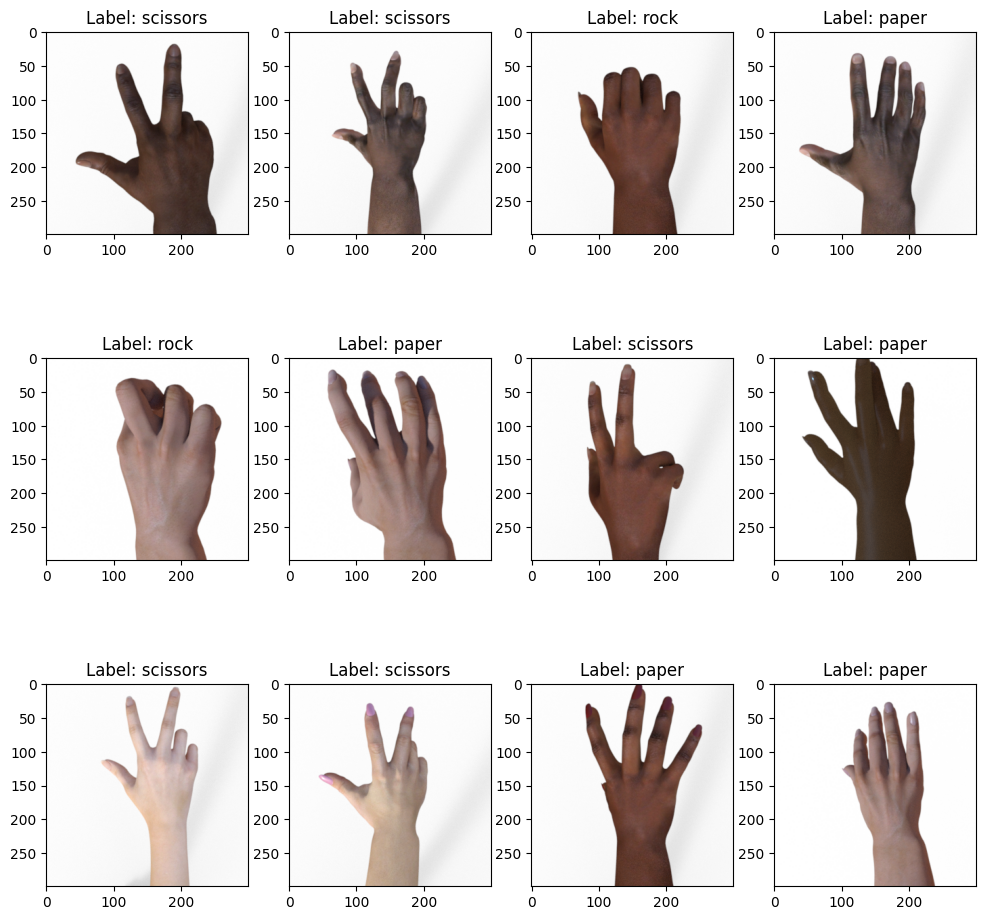

In [5]:
from dataprocessing import preview_dataset
# Explore raw training dataset images.
preview_dataset(dataset_train_raw, get_label_name)

Now I will pre-process the images in the dataset and create train and test sets.

In [6]:
INPUT_IMG_SIZE = 150
def format_example(image, label):
    # Make image color values to be float.
    image = tf.cast(image, tf.float32)
    # Make image color values to be in [0..1] range.
    image = image / 255.
    # Make sure that image has a right size
    image = tf.image.resize(image, [INPUT_IMG_SIZE, INPUT_IMG_SIZE])
    return image, (label,label,label)

In [7]:
dataset_train = dataset_train_raw.map(format_example)
dataset_test = dataset_test_raw.map(format_example)

In [8]:
BATCH_SIZE = 32

dataset_train_shuffled = dataset_train.shuffle(
    buffer_size=NUM_TRAIN_EXAMPLES
)

dataset_train_shuffled = dataset_train.batch(
    batch_size=BATCH_SIZE
)

# Prefetch will enable the input pipeline to asynchronously fetch batches while your model is training.
dataset_train_shuffled = dataset_train_shuffled.prefetch(
    buffer_size=tf.data.experimental.AUTOTUNE
)

dataset_test_shuffled = dataset_test.batch(BATCH_SIZE)

In [ ]:
print(dataset_train_shuffled)
print(dataset_test_shuffled)

## Training the Network

I again use the functional API to create the network as its unusual structure is difficult to obtain using `tensorflow.keras.Sequential()`.

In [10]:
class InceptionModule(layers.Layer):
    def __init__(self, filters_1x1, filters_3x3_reduce, filters_3x3, filters_5x5_reduce, filters_5x5, filters_pool):
        super(InceptionModule, self).__init__()

        self.conv1x1 = layers.Conv2D(filters_1x1, (1, 1), padding='same', activation='relu')
        self.conv3x3_reduce = layers.Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu')
        self.conv3x3 = layers.Conv2D(filters_3x3, (3, 3), padding='same', activation='relu')
        self.conv5x5_reduce = layers.Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu')
        self.conv5x5 = layers.Conv2D(filters_5x5, (5, 5), padding='same', activation='relu')
        self.maxpool = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')
        self.maxpool_proj = layers.Conv2D(filters_pool, (1, 1), padding='same', activation='relu')

    def call(self, inputs):
        conv1x1 = self.conv1x1(inputs)
        conv3x3_reduce = self.conv3x3_reduce(inputs)
        conv3x3 = self.conv3x3(conv3x3_reduce)
        conv5x5_reduce = self.conv5x5_reduce(inputs)
        conv5x5 = self.conv5x5(conv5x5_reduce)
        maxpool = self.maxpool(inputs)
        maxpool_proj = self.maxpool_proj(maxpool)

        output = tf.concat([conv1x1, conv3x3, conv5x5, maxpool_proj], axis=-1)
        return output

class InceptionV1(tf.keras.Model):
    def __init__(self, num_classes=1000, training=False):
        super(InceptionV1, self).__init__()
        self.training=training
        self.num_classes=num_classes
        self.conv1 = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')
        self.maxpool1 = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')
        self.conv2 = layers.Conv2D(64, (1, 1), padding='same', activation='relu')
        self.conv3 = layers.Conv2D(192, (3, 3), padding='same', activation='relu')
        self.maxpool2 = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')

        self.inception3a = InceptionModule(64, 96, 128, 16, 32, 32)
        self.inception3b = InceptionModule(128, 128, 192, 32, 96, 64)

        self.maxpool3 = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')

        self.inception4a = InceptionModule(192, 96, 208, 16, 48, 64)
        self.inception4b = InceptionModule(160, 112, 224, 24, 64, 64)
        self.inception4c = InceptionModule(128, 128, 256, 24, 64, 64)
        self.inception4d = InceptionModule(112, 144, 288, 32, 64, 64)
        self.inception4e = InceptionModule(256, 160, 320, 32, 128, 128)

        self.maxpool4 = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')

        self.inception5a = InceptionModule(256, 160, 320, 32, 128, 128)
        self.inception5b = InceptionModule(384, 192, 384, 48, 128, 128)

        self.avgpool = layers.GlobalAveragePooling2D()
        self.dropout = layers.Dropout(0.4)
        self.fc = layers.Dense(num_classes, activation='softmax')

        self.auxiliary1 = self.create_auxiliary_classifier()
        self.auxiliary2 = self.create_auxiliary_classifier()

    def create_auxiliary_classifier(self):
      auxiliary_classifier = tf.keras.Sequential([
          layers.AveragePooling2D((5, 5), strides=(3, 3), padding='valid'),
          layers.Conv2D(128, (1, 1), padding='same', activation='relu'),
          layers.Flatten(),
          layers.Dense(1024, activation='relu'),
          layers.Dropout(0.7),
          layers.Dense(self.num_classes, activation='softmax')
        ])

      return auxiliary_classifier

    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.maxpool2(x)
        x = self.inception3a(x)
        x = self.inception3b(x)
        x = self.maxpool3(x)
        x = self.inception4a(x)
        # Auxiliary Classifier 1
        if self.training:
          aux1 = self.auxiliary1(x)
        x = self.inception4b(x)
        x = self.inception4c(x)
        x = self.inception4d(x)
        # Auxiliary Classifier 2
        if self.training:
          aux2 = self.auxiliary2(x)
        x = self.inception4e(x)
        x = self.maxpool4(x)
        x = self.inception5a(x)
        x = self.inception5b(x)
        x = self.avgpool(x)
        x = self.dropout(x)
        x = self.fc(x)

        if self.training:
          return x, aux1, aux2
        else:
          return x



In [11]:
model = InceptionV1(num_classes=10, training=True)
model.build((None, 224, 224, 3))  # Specify input shape
model.summary()

Model: "inception_v1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             multiple                  9472      
                                                                 
 max_pooling2d (MaxPooling2D  multiple                 0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           multiple                  4160      
                                                                 
 conv2d_2 (Conv2D)           multiple                  110784    
                                                                 
 max_pooling2d_1 (MaxPooling  multiple                 0         
 2D)                                                             
                                                                 
 inception_module (Inception  multiple                

The architecture has much less parameters compared to VGG16. Let's see how it performs on the dataset.

In [ ]:
# Create an instance of the InceptionV1 model
model = InceptionV1(num_classes=3,training=True)

model.build(input_shape=(None, 150, 150, 3))
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.009)

# Compile the model with the custom loss function
model.compile(optimizer=optimizer, loss=tf.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

# Train the model using model.fit()
history=model.fit(dataset_train_shuffled, epochs=50, validation_data=dataset_test_shuffled)

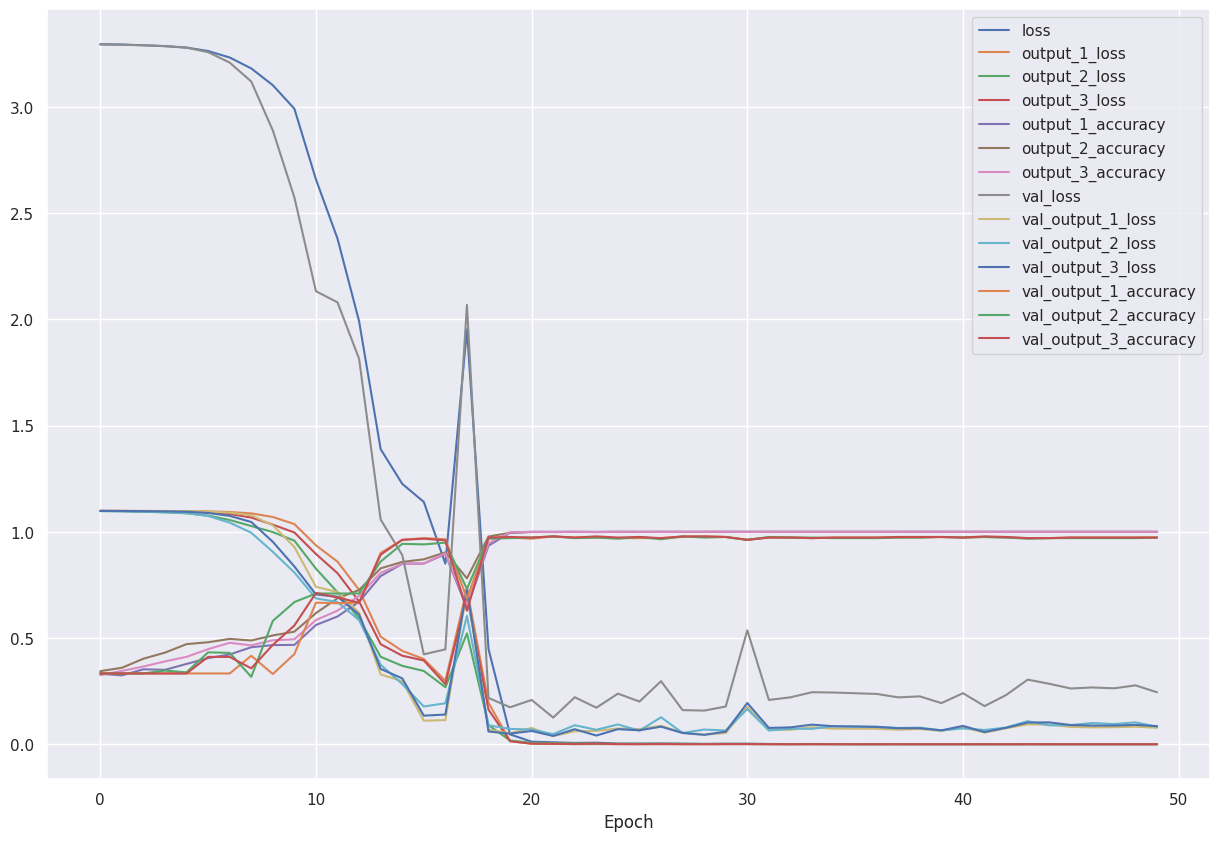

In [13]:
sns.set_theme()
pd.DataFrame(history.history).plot(figsize=(15, 10))
plt.xlabel("Epoch")
plt.legend(loc="best")
plt.show()

The model demonstrates exceptional performance on the validation set. As mentioned earlier, the original model utilized a combined loss function. In my attempt to replicate this approach, I will evaluate its performance and assess its effectiveness.

In [20]:
def total_loss(y_true, y_pred):
    main_output = y_pred[2]
    aux_output1 = y_pred[1]
    aux_output2 = y_pred[0]

    main_labels = y_true[2]
    aux_labels1 = y_true[1]
    aux_labels2 = y_true[0]

    main_loss = tf.losses.sparse_categorical_crossentropy(main_labels, main_output)
    aux_loss1 = tf.losses.sparse_categorical_crossentropy(aux_labels1, aux_output1)
    aux_loss2 = tf.losses.sparse_categorical_crossentropy(aux_labels2, aux_output2)

    total_loss = main_loss + 0.3 * (aux_loss1 + aux_loss2)
    return total_loss

In [ ]:
# Create an instance of the InceptionV1 model
model = InceptionV1(num_classes=3,training=True)

model.build(input_shape=(None, 150, 150, 3))
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.009)

# Compile the model with the custom loss function
model.compile(optimizer=optimizer, loss=total_loss, metrics=['accuracy'])

# Train the model using model.fit()
history=model.fit(dataset_train_shuffled, epochs=50, validation_data=dataset_test_shuffled)

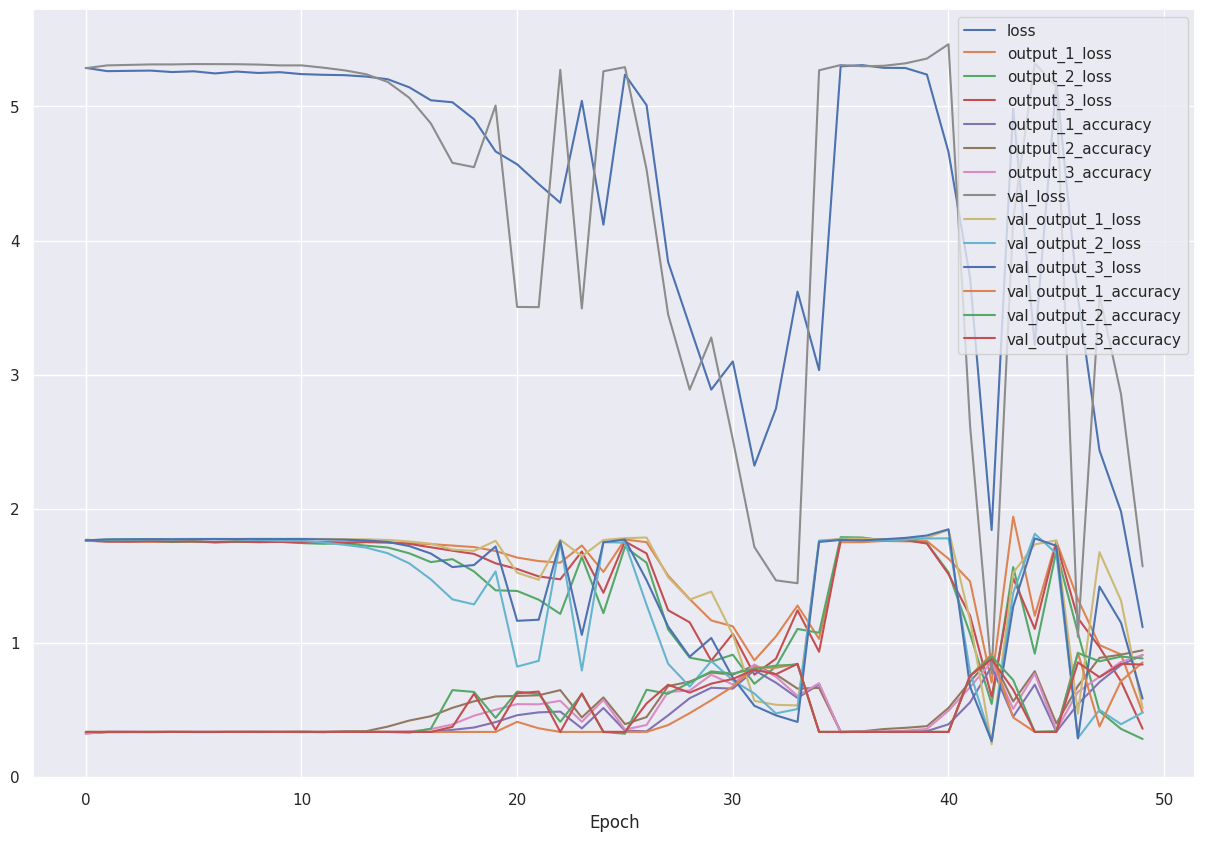

In [22]:
sns.set_theme()
pd.DataFrame(history.history).plot(figsize=(15, 10))
plt.xlabel("Epoch")
plt.legend(loc="best")
plt.show()

It appears that using the combined loss may not be as effective as anticipated even though it still seems to be performing well. To explore alternative approaches, I plan to include an additional section in this notebook where I will implement a custom training loop. The objective is to investigate if I can leverage the concept of the combined loss in a more efficient way.

# TF Flowers Dataset

Now I will load TF Flowers Dataset and train the model on this dataset using various learning rate schedulers that we previously discussed.

In [ ]:
#https://medium.com/@nutanbhogendrasharma/tensorflow-image-classification-with-tf-flowers-dataset-e36205deb8fc : Credit for loading dataset
(training_set, validation_set), dataset_info = tfds.load(
    'tf_flowers',
    split=['train[:70%]', 'train[70%:]'],
    with_info=True,
    as_supervised=True,
)

In [24]:
num_classes=5

In [25]:
num_training_examples = 0
num_validation_examples = 0
for example in training_set:
    num_training_examples += 1
for example in validation_set:
    num_validation_examples += 1
print('Total Number of Classes: {}'.format(num_classes))
print('Total Number of Training Images: {}'.format(num_training_examples))
print('Total Number of Validation Images: {} \n'.format(num_validation_examples))

Total Number of Classes: 5
Total Number of Training Images: 2569
Total Number of Validation Images: 1101 



In [ ]:
from dataprocessing import format_image

BATCH_SIZE = 32
train_batches = training_set.shuffle(num_training_examples//4).map(format_image).batch(BATCH_SIZE).prefetch(1)
validation_batches = validation_set.map(format_image).batch(BATCH_SIZE).prefetch(1)
print(train_batches)
print(validation_batches)

Let's visualize one of the instances from the dataset.

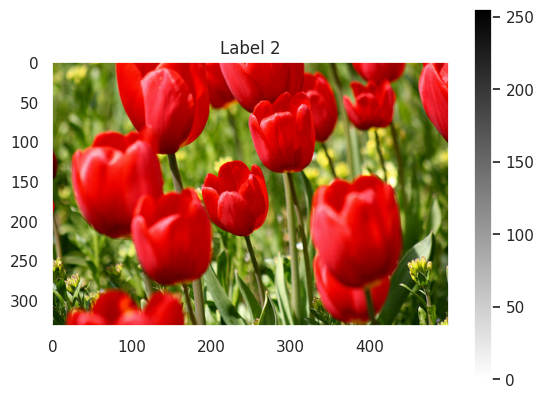

In [27]:
for image, label in training_set.take(5):
    break
image = image.numpy()
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.title('Label {}'.format(label))
plt.colorbar()
plt.grid(False)
plt.show()

## Training Inception Net on TF Flowers Dataset

Let's now train the model on TF Flowers Dataset to see how it will perform on this one.

In [28]:
model=InceptionV1(num_classes=num_classes,training=True)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [ ]:
history=model.fit(train_batches, epochs=50, validation_data=validation_batches)

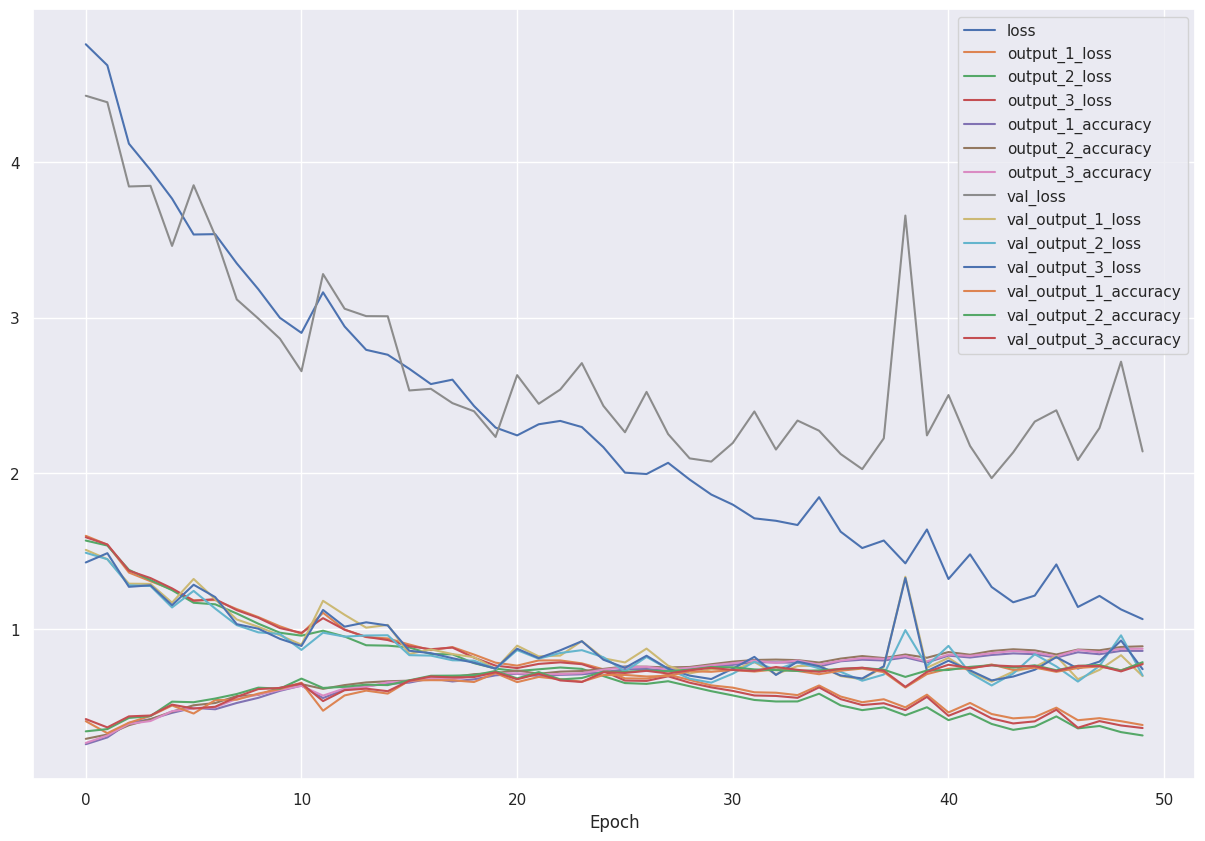

In [30]:
sns.set_theme()
pd.DataFrame(history.history).plot(figsize=(15, 10))
plt.xlabel("Epoch")
plt.legend(loc="best")
plt.show()

It appears that Inception Net does not perform as well as it performed on Rock-Paper-Scissors Dataset. Let's see if learning rate schedulers will improve the results.

In [31]:
from Scheduler import WarmUpCallbackEpoch

In [32]:
model1 = InceptionV1(num_classes=num_classes,training=True)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
lr_scheduler = WarmUpCallbackEpoch(num_epochs=50, warmup_epochs=3)
model1.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [ ]:
history=model1.fit(train_batches, epochs=50, validation_data=validation_batches,callbacks=[lr_scheduler.warm_up_with_cosine_epoch()])

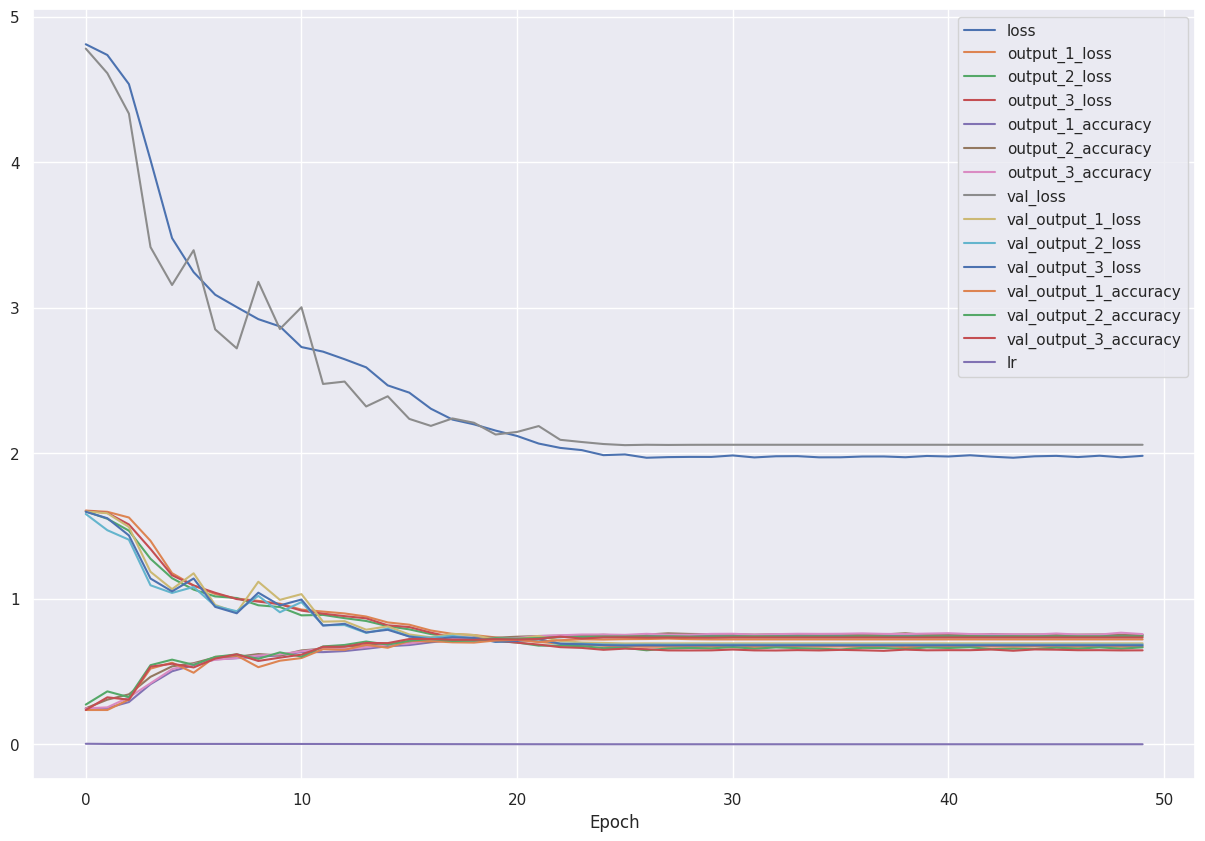

In [34]:
sns.set_theme()
pd.DataFrame(history.history).plot(figsize=(15, 10))
plt.xlabel("Epoch")
plt.legend(loc="best")
plt.show()

In [35]:
from Scheduler import WarmUpCallbackBatch

In [36]:
model2 = InceptionV1(num_classes=num_classes,training=True)

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
warmup_callback = WarmUpCallbackBatch(warmup_steps=250, initial_lr=0.01, num_epochs=50)
model2.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model2.fit(train_batches, epochs=50, validation_data=validation_batches,callbacks=[warmup_callback], use_multiprocessing = True, workers=4)

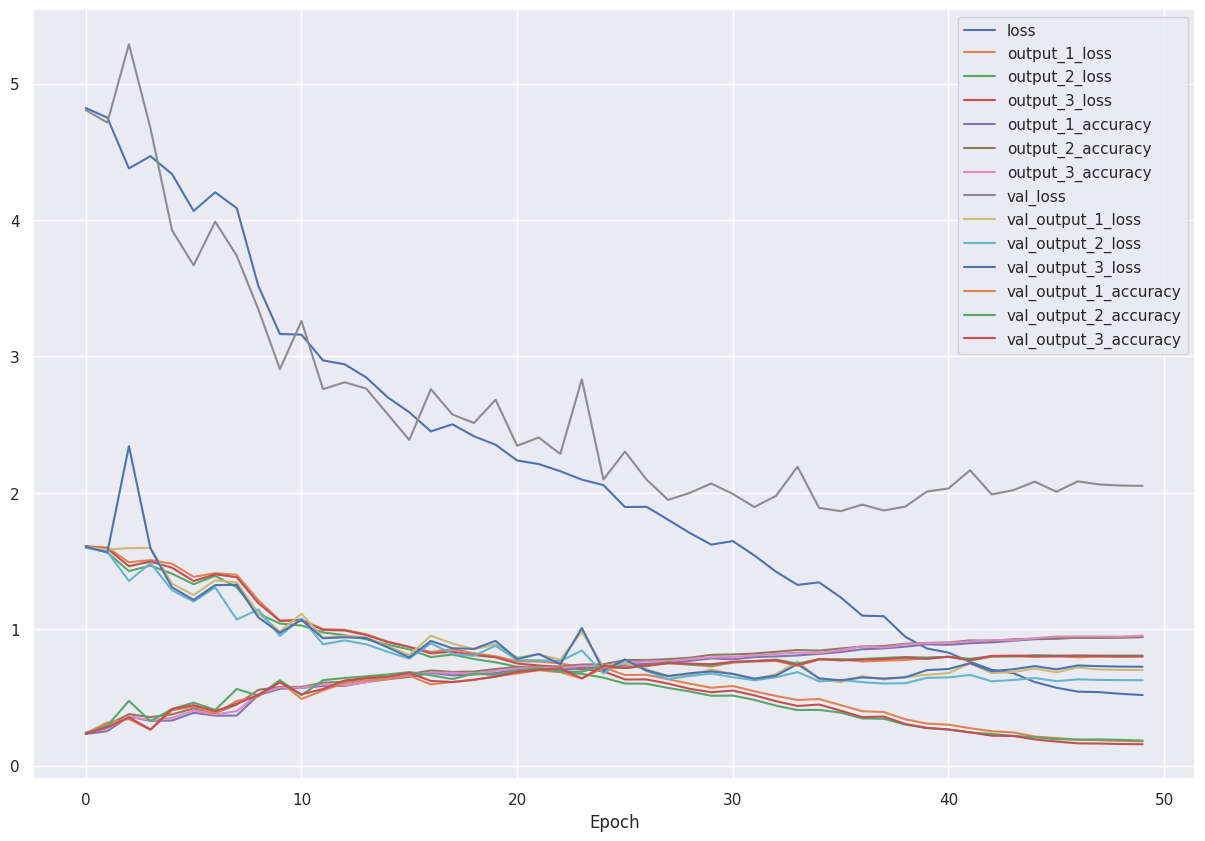

In [38]:
sns.set_theme()
pd.DataFrame(history.history).plot(figsize=(15, 10))
plt.xlabel("Epoch")
plt.legend(loc="best")
plt.show()

In [39]:
from Scheduler import WarmUpCosineDecayRestarts

In [ ]:
model3=InceptionV1(num_classes=num_classes,training=True)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.005, momentum=0.9)
warmup_callback = WarmUpCosineDecayRestarts(num_epochs=50,warmup_steps=40, cycle_length=250)
model3.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model3.fit(train_batches, epochs=50, validation_data=validation_batches,callbacks=[warmup_callback], use_multiprocessing = True, workers=4)

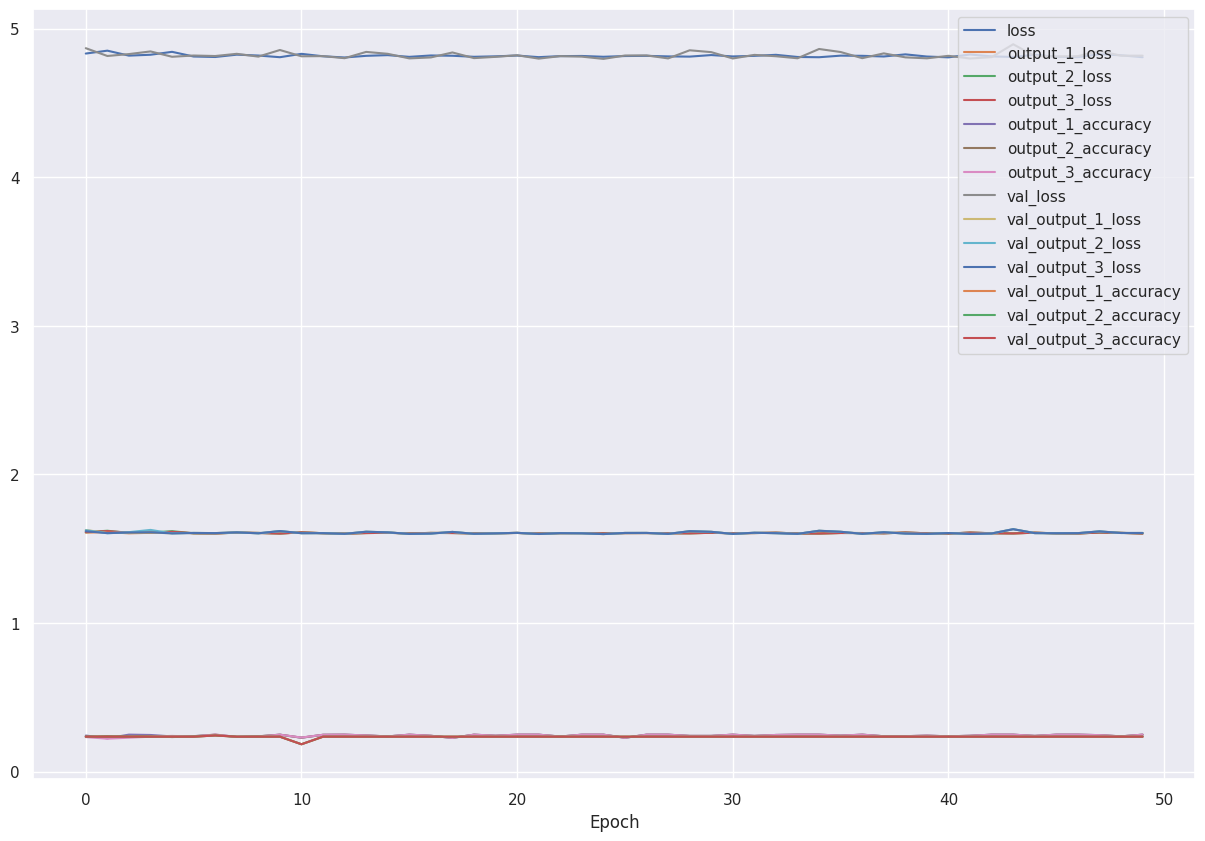

In [41]:
sns.set_theme()
pd.DataFrame(history.history).plot(figsize=(15, 10))
plt.xlabel("Epoch")
plt.legend(loc="best")
plt.show()

The model trained with `WarmUpCallbackBatch` exhibited some improvement in the results. However, it appears that further actions are necessary to address the issue of overfitting. One approach could be simplifying the architecture to reduce complexity. Alternatively, fine-tuning the learning rate might also be explored to determine if it leads to improved results.

## Custom Training on Rock-Paper-Scissors Dataset

I did prefer not to duplicate the code for importing the dataset and instead ran the code from the preceding section. The `InceptionTrainer` function incorporates various essential parameters and constructs the custom loop. Within this loop, the total loss is calculated, taking into consideration the auxiliary losses. The only modification made here was reducing the learning rate from 0.01 to 0.001. After 25 epochs, the model achieved a validation accuracy of 0.95. I suggest examining the custom loop inside the provided Python file for further details.

In [ ]:
from InceptionV1 import InceptionV1, InceptionTrainer

In [ ]:
model = InceptionV1(num_classes=3, training=True)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.009)
num_epochs = 25

history_func = InceptionTrainer(model, optimizer, num_epochs, dataset_train_shuffled, dataset_test_shuffled)
history_func()


<Figure size 1200x400 with 0 Axes>

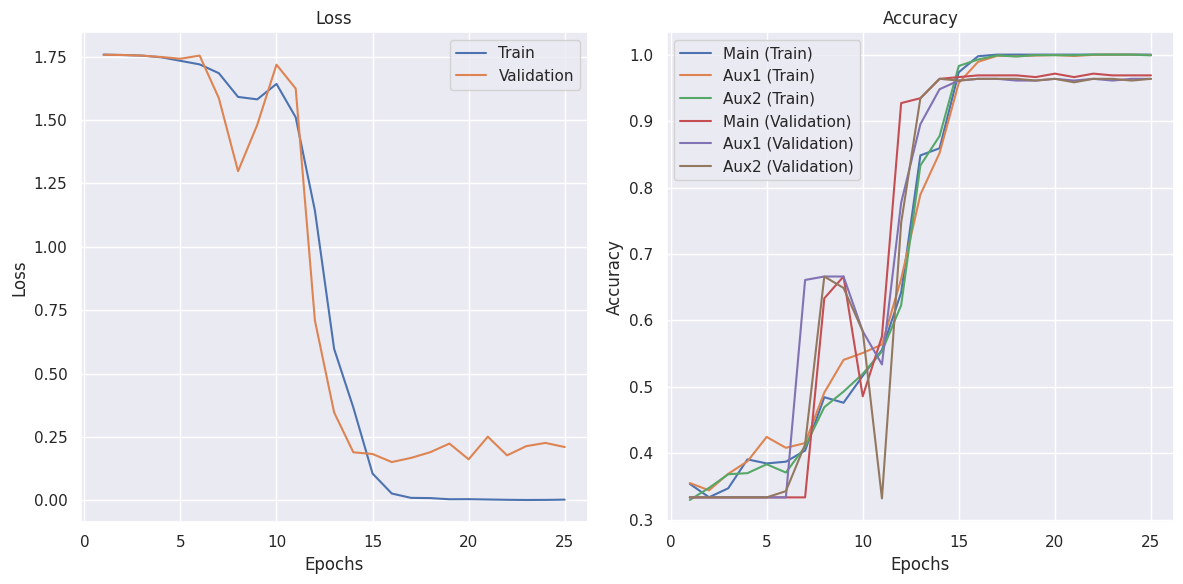

In [ ]:
history_func()

## Hebbian Learning Theory and Inception Module

The authors also highlighted the biological plausibility of the architecture (or inspiration behind their design choice)) above using Hebbian Learning theory to provide a theoretical grounding for their model. As we discussed above, the inception model consists of multiple parallel convolutional layers with different filter sizes. These parallel layers capture information at different scales and are combined to form the output of the module. Moreover, the authors sought to address the challenge of designing deep networks with a large number of parameters while avoiding overfitting and computational inefficiency.

* The most straightforward way of improving the performance of deep neural networks is by increasing their size. This includes both increasing the depth – the number of levels – of the network and its width: the number of units at each level. This is as an easy and safe way of training higher quality models, especially given the availability of a large amount of labeled training data. However this simple solution comes with two major drawbacks. Bigger size typically means a larger number of parameters, which makes the enlarged network more prone to overfitting, especially if the number of labeled examples in the training set is limited. Another drawback of uniformly increased network size is the dramatically increased use of computational resources. - [Going deeper with convolutions](https://arxiv.org/pdf/1409.4842)

The authors proposed that the solution to both of the problems lies in moving to sparsely connected architectures.

* The fundamental way of solving both issues would be by ultimately moving from fully connected to sparsely connected architectures, even inside the convolutions. Besides mimicking biological systems, this would also have the advantage of firmer theoretical underpinnings due to the groundbreaking work of Arora et al. Their main result states that if the probability distribution of the data-set is representable by a large, very sparse deep neural network, then the optimal network topology can be constructed layer by layer by analyzing the correlation statistics of the activations of the last layer and clustering neurons with highly correlated outputs. Although the strict mathematical proof requires very strong conditions, the fact that this statement resonates with the well known Hebbian principle – neurons that fire together, wire together – suggests that the underlying idea is applicable even under less strict conditions, in practice. [Going deeper with convolutions](https://arxiv.org/pdf/1409.4842)

The statement above can be confusing for those that are not familiar with computational neuroscience. In simple terms, the authors suggest that the use of inception module which is derived from the idea of multiple parallel convolutional layers with different filter sizes to capture information at various scales is a good way to find optimal network topology. For instance, this design can be seen as an attempt to mimic the way visual information is processed in the human visual cortex, where neurons at different cortical depths respond to different scales of visual stimuli and a practical strategy for designing the network topology in a way that exploits the structure and characteristics of the data. This approach may allow the network to determine which neurons should be grouped together in the same layer, enabling the construction of an efficient and effective network architecture. Inception module enables the internal layers to adapt and select the appropriate filter size to learn the necessary information.

## Additional Sources

1. [Deep Learning: GoogLeNet Explained](https://towardsdatascience.com/deep-learning-googlenet-explained-de8861c82765)
2. [Understanding GoogLeNet Model – CNN Architecture](https://www.geeksforgeeks.org/understanding-googlenet-model-cnn-architecture/)
3. [Deep Learning in the Trenches: Understanding Inception Network from Scratch](https://www.analyticsvidhya.com/blog/2018/10/understanding-inception-network-from-scratch/)
4. [Deep Learning: Understanding The Inception Module](https://towardsdatascience.com/deep-learning-understand-the-inception-module-56146866e652)
5. [Review of Inception from V1 to V4](https://sheng-fang.github.io/2020-05-05-review-googlenet-v1-v4/#3)
6. [ML | Inception Network V1](https://www.geeksforgeeks.org/ml-inception-network-v1/)
7. [Multi-Branch Networks (GoogLeNet)](https://d2l.ai/chapter_convolutional-modern/googlenet.html)
8. [Inception V1 Architecture Explained](https://medium.com/@abheerchrome/inception-v1-architecture-explained-454b2eb66baf)
9. [A Simple Guide to the Versions of the Inception Network](https://towardsdatascience.com/a-simple-guide-to-the-versions-of-the-inception-network-7fc52b863202)

## General References

The references below are the main sources I used for preparing the notebooks in this repository.

1. Murphy, K. P. (2022). Probabilistic machine learning: an introduction. MIT press.
2. Géron, A. (2022). Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow. " O'Reilly Media, Inc.".
3. Chollet, F. (2021). Deep learning with Python. Simon and Schuster.
4. Kar, K. (2020). Mastering Computer Vision with TensorFlow 2. x: Build advanced computer vision applications using machine learning and deep learning techniques. Packt Publishing Ltd.
5. Planche, B., & Andres, E. (2019). Hands-On Computer Vision with TensorFlow 2: Leverage deep learning to create powerful image processing apps with TensorFlow 2.0 and Keras. Packt Publishing Ltd.
6. Lakshmanan, V., Görner, M., & Gillard, R. (2021). Practical Machine Learning for Computer Vision. " O'Reilly Media, Inc.".